<a href="https://colab.research.google.com/github/abdipourasl/CNN---Scalogram/blob/main/Reca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/My Drive/Reca')
os.listdir('/content/drive/My Drive/Reca')

['OCD', 'norm', 'logs']

In [4]:
data_dir= '/content/drive/My Drive/Reca'

In [ ]:
os.listdir(os.path.join(data_dir,'OCD'))

['reca_OCD_S1_005.png',
 'reca_OCD_S3_009.png',
 'reca_OCD_S2_004.png',
 'reca_OCD_S2_003.png',
 'reca_OCD_S1_004.png',
 'reca_OCD_S3_005.png',
 'reca_OCD_S2_007.png',
 'reca_OCD_S1_003.png',
 'reca_OCD_S2_008.png',
 'reca_OCD_S4_001.png',
 'reca_OCD_S2_001.png',
 'reca_OCD_S2_009.png',
 'reca_OCD_S3_007.png',
 'reca_OCD_S3_006.png',
 'reca_OCD_S2_005.png',
 'reca_OCD_S2_002.png',
 'reca_OCD_S1_009.png',
 'reca_OCD_S4_002.png',
 'reca_OCD_S2_006.png',
 'reca_OCD_S1_008.png',
 'reca_OCD_S1_006.png',
 'reca_OCD_S3_004.png',
 'reca_OCD_S3_002.png',
 'reca_OCD_S3_003.png',
 'reca_OCD_S3_001.png',
 'reca_OCD_S1_002.png',
 'reca_OCD_S1_007.png',
 'reca_OCD_S3_008.png',
 'reca_OCD_S1_001.png',
 'reca_OCD_S7_003.png',
 'reca_OCD_S5_005.png',
 'reca_OCD_S5_007.png',
 'reca_OCD_S8_001.png',
 'reca_OCD_S6_003.png',
 'reca_OCD_S5_008.png',
 'reca_OCD_S6_006.png',
 'reca_OCD_S5_004.png',
 'reca_OCD_S6_007.png',
 'reca_OCD_S6_001.png',
 'reca_OCD_S4_005.png',
 'reca_OCD_S7_005.png',
 'reca_OCD_S6_00

In [ ]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [ ]:
img=cv2.imread(os.path.join('/content/drive/My Drive/Reca','OCD','reca_OCD_S46_009.png'))
img.shape


(224, 224, 3)

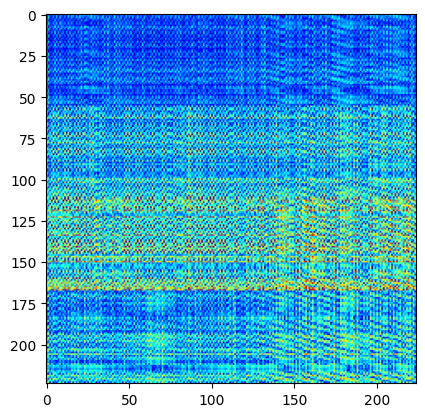

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

# Load Data:

In [ ]:
import numpy as np

In [ ]:
#tf.data.Dataset??

In [ ]:
data= tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Reca',shuffle=False,batch_size=9)

Found 828 files belonging to 2 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator= data.as_numpy_iterator()


In [ ]:
batch=data_iterator.next()

In [ ]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
batch[0].shape

(9, 256, 256, 3)

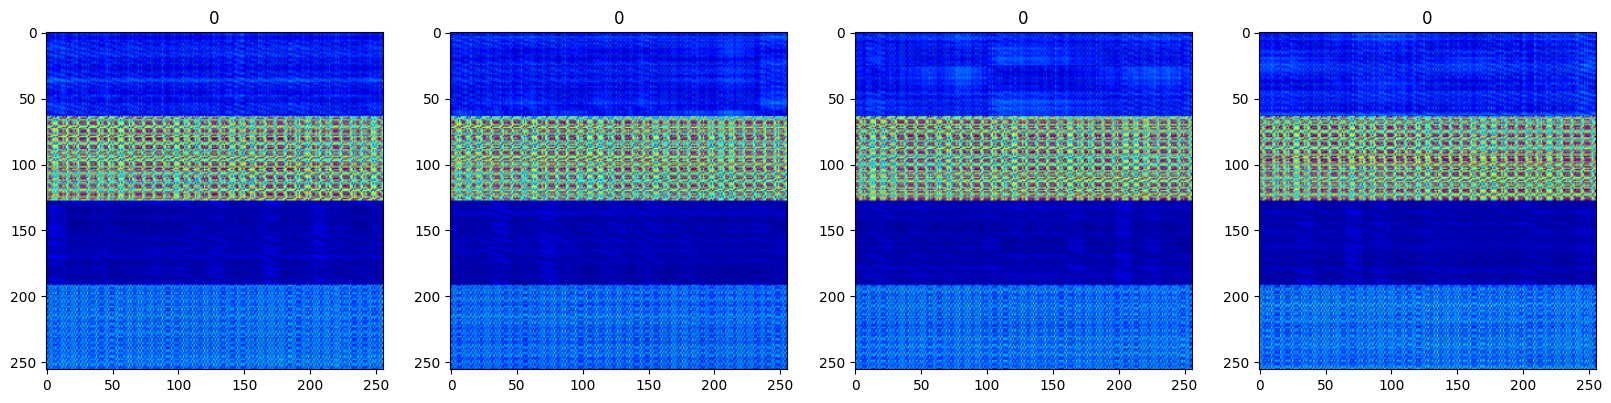

In [ ]:
# 0 = norm
# 1 = OCD


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data:

In [ ]:
data.as_numpy_iterator().next()

(array([[[[  0.      ,  48.      , 255.      ],
          [  0.      ,  22.      , 255.      ],
          [  0.      ,   5.      , 235.75    ],
          ...,
          [  0.      ,  33.      , 237.5     ],
          [  0.      ,   8.25    , 209.5     ],
          [  0.      ,  44.      , 255.      ]],
 
         [[  0.      ,   9.      , 167.25    ],
          [  0.      ,   4.125   , 220.0625  ],
          [  0.      ,   9.875   , 244.28125 ],
          ...,
          [  0.      ,  39.296875, 251.71875 ],
          [  0.      ,  70.203125, 237.9375  ],
          [  0.      ,   8.25    , 209.5     ]],
 
         [[  0.      ,   0.      , 188.25    ],
          [  0.      ,   0.      , 197.39062 ],
          [  0.      ,   3.4375  , 237.65625 ],
          ...,
          [  0.      ,  22.1875  , 245.54688 ],
          [  0.      ,  50.984375, 246.04688 ],
          [  0.      ,   0.      , 207.25    ]],
 
         ...,
 
         [[  0.      ,  23.75    , 224.75    ],
          [  0.   

In [ ]:
data.as_numpy_iterator().next()[0].max()

255.0

In [ ]:
data= data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.1882353 , 1.        ],
          [0.        , 0.08627451, 1.        ],
          [0.        , 0.01960784, 0.9245098 ],
          ...,
          [0.        , 0.12941177, 0.9313725 ],
          [0.        , 0.03235294, 0.8215686 ],
          [0.        , 0.17254902, 1.        ]],
 
         [[0.        , 0.03529412, 0.65588236],
          [0.        , 0.01617647, 0.8629902 ],
          [0.        , 0.03872549, 0.9579657 ],
          ...,
          [0.        , 0.1541054 , 0.9871324 ],
          [0.        , 0.27530637, 0.93308824],
          [0.        , 0.03235294, 0.8215686 ]],
 
         [[0.        , 0.        , 0.7382353 ],
          [0.        , 0.        , 0.7740809 ],
          [0.        , 0.01348039, 0.9319853 ],
          ...,
          [0.        , 0.0870098 , 0.96292895],
          [0.        , 0.19993873, 0.9648897 ],
          [0.        , 0.        , 0.8127451 ]],
 
         ...,
 
         [[0.        , 0.09313726, 0.8813726 ],
          [0.     

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

# Split Data:

In [ ]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [ ]:
len(data)

92

In [ ]:
data.shuffle

<bound method DatasetV2.shuffle of <_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>

In [ ]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)


In [ ]:
len(train)

64

# Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
64/64 [==============================] - 50s 761ms/step - loss: 7.7727 - accuracy: 0.9219 - val_loss: 3.0662e-11 - val_accuracy: 1.0000
Epoch 2/20
64/64 [==============================] - 43s 663ms/step - loss: 4.2226 - accuracy: 0.7812 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 3/20
64/64 [==============================] - 40s 625ms/step - loss: 1.2106 - accuracy: 0.6406 - val_loss: 0.1393 - val_accuracy: 1.0000
Epoch 4/20
64/64 [==============================] - 42s 653ms/step - loss: 0.8225 - accuracy: 0.4167 - val_loss: 0.7323 - val_accuracy: 0.0000e+00
Epoch 5/20
64/64 [==============================] - 44s 682ms/step - loss: 0.6826 - accuracy: 0.7188 - val_loss: 0.7817 - val_accuracy: 0.0000e+00
Epoch 6/20
64/64 [==============================] - 42s 658ms/step - loss: 0.6673 - accuracy: 0.7188 - val_loss: 0.8265 - val_accuracy: 0.0000e+00
Epoch 7/20
64/64 [==============================] - 47s 734ms/step - loss: 1.5940 - accuracy: 0.9062 - val_loss: 7.8621e-16 - 

In [ ]:
hist.history

{'loss': [7.772745609283447,
  4.222562789916992,
  1.2106107473373413,
  0.8224964737892151,
  0.6825835704803467,
  0.6672561764717102,
  1.5939750671386719,
  4.070006847381592,
  1.5838353633880615,
  0.4275593161582947,
  0.3453861474990845,
  0.3466408848762512,
  0.33218374848365784,
  0.3206683397293091,
  0.32592883706092834,
  0.3224225342273712,
  0.3182254433631897,
  0.3197067379951477,
  0.31842511892318726,
  0.44426673650741577],
 'accuracy': [0.921875,
  0.78125,
  0.640625,
  0.4166666567325592,
  0.71875,
  0.71875,
  0.90625,
  0.8125,
  0.71875,
  0.7743055820465088,
  0.8125,
  0.8142361044883728,
  0.8211805820465088,
  0.8194444179534912,
  0.8229166865348816,
  0.828125,
  0.8246527910232544,
  0.8263888955116272,
  0.828125,
  0.7899305820465088],
 'val_loss': [3.066196949119693e-11,
  0.06169753149151802,
  0.1393369734287262,
  0.7323392629623413,
  0.7816870212554932,
  0.8265119791030884,
  7.862092053778635e-16,
  9.527460070879457e-11,
  0.40258166193962

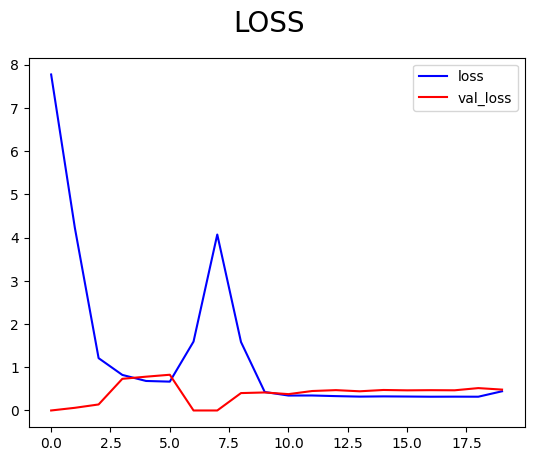

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

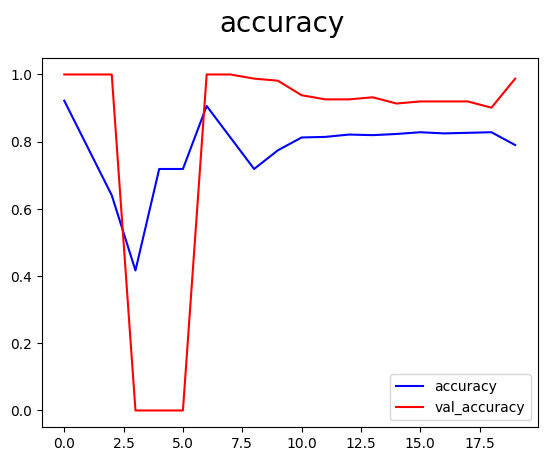

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 155ms/step


In [ ]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 1.0 Recall: 1.0  Accuracy : 1.0 
